In [ ]:
# LINEAR/RANDOM FORREST REGRESSION

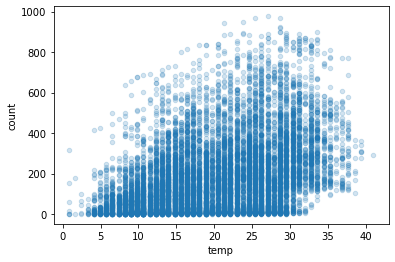

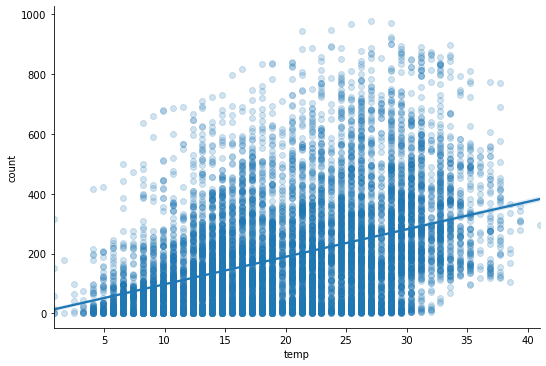

In [2]:
# 1. Wczytaj biblioteki 

# read the data and set the datetime as the index, taken from Kaggle: https://www.kaggle.com/c/bike-sharing-demand/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #using seaborn to get a line of best fit
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle

# 2. Wczytaj i przygotuj dane
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

# Przejrzyj dane
bikes.head()
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

bikes[['count', 'temp']].corr()
#plt.figure(figsize=(10,7))
#sns.heatmap(bikes.corr(), annot= True, cmap='PuBu')

# Przygotuj dane: a) usuń lub zastąp brakujące i nieprawidłowe dane, b) usuń duplikaty, c) dodaj lub usuń kolumny, 
# d) zaawansowane transformacje: standaryzuj dane, automatycznie ekstraktuj predyktory (np. PCA) 

# a) działa w nowszej wersji chyba
# bikes = bikes[bikes.temp.notna()]
# bikes = bikes[bikes.count.notna()]
# bikes

bikes= bikes.dropna(axis=0, how='any', thresh=None, subset=['count'], inplace=False)
# incorrect_records=bikes[bikes['count']<0]
# incorrect_records.head()
#Lets change incorect values and confirm that it worked
# bikes['count']=np.where(bikes['count']<0,bikes['count'].mean(),bikes['count'])
# bikes[bikes['count']<0]

# b)
# len(bikes.identity_column.unique())
# bikes = bikes.drop_duplicates(['identity_column'])
# bikes

# c)
#bikes.drop(['season'], axis = 1, inplace = True)
# bikes['new column']=bikes['column1', 'column2'].apply(function defined on columns)

In [3]:
# 3. Zdefiniuj zmienne przewidywane
Y = bikes['count'] # our response variable

# 4. Zdefiniuj zmienne przewidujące
feature_cols = ['temp', 'weather', 'humidity'] # a list of the predictors
X = bikes[feature_cols] # subsetting our data to only the predictors

# 5. Utwórz model ML
X_train, X_test, Y_train, Y_test = train_test_split(X, Y) # split the data into training and testing sets

linreg = LinearRegression() #instantiate a new model
linreg.fit(X_train, Y_train) #fit the model to our data
Y_pred = linreg.predict(X_test) # predict our testing set
#temperature = np.array([[20]])
#linreg.predict(temperature)

rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test) # predict our testing set

nullRMSE is 181.1361335742659
lrRMSE is 163.77824927727002
rfRMSE is 159.85125106038174
intercept is 185.35984617958317
linear coefficients are {('weather', 5.793627190046629), ('humidity', -2.8206966089741154), ('temp', 8.464084495600137)}


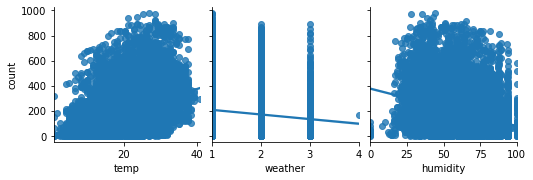

In [4]:
# 6. Interpretuj model ML

# evaluate the null model
average_bike_rental = bikes['count'].mean()
average_bike_rental
num_rows = bikes.shape[0]
num_rows
null_model_predictions = [average_bike_rental]*num_rows
null_model_predictions
print('nullRMSE is', np.sqrt(metrics.mean_squared_error(Y, null_model_predictions)))

# evaluate ML model
print('lrRMSE is', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))) # RMSE
print('rfRMSE is', np.sqrt(metrics.mean_squared_error(Y_test, Y_rf))) # RMSE

# print the coefficients
print('intercept is',linreg.intercept_) # our Beta_0
# pair the feature names with the coefficients
result = zip(feature_cols, linreg.coef_)
resultSet = set(result)
print('linear coefficients are', resultSet)
#print(linreg.coef_) # our linear coefficient
# multiple scatter plots
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

In [5]:
# Tabela wyników
TestingData=pd.DataFrame()
TestingData['reg_prediction']=Y_pred
TestingData['lin_prediction']=Y_rf
TestingData['demand']=Y_test
features= ['temp', 'weather', 'humidity']
TestingData[features]= X_test

<AxesSubplot:xlabel='humidity', ylabel='lin_prediction'>

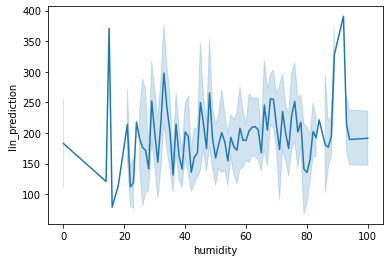

In [6]:
sns.lineplot(data=TestingData, x="humidity", y="lin_prediction")

<AxesSubplot:xlabel='humidity', ylabel='demand'>

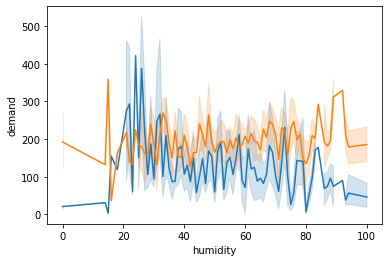

In [7]:
sns.lineplot(data=TestingData, x="humidity", y="demand")
sns.lineplot(data=TestingData, x="humidity", y="reg_prediction")

In [8]:
# 7. Wdrożenie do produkcji: a) Save ML model as an PKL object and use it as independent application, b) Transfer ML-derived rules
# rules to a custom function and apply this to make an prediction, c) Create API/web application to handle inputs and outputs- 
# Django/Flask/Dash or MS Azure, d) Define a business process to acquire and share relevant data in a specified way

# a) save the model to disk
filename = 'veturilo_demand_prediction.sav'
pickle.dump(rf, open(filename, 'wb'))
# some time later...load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test) #R2 goodness of fit score
print(result)

0.2804646662568334
